In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
df = pd.read_csv("./hotel_booking.csv")

In [3]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
df.describe(include=object)

,Booking_ID,type of meal,room type,market segment type,date of reservation,booking status
count,36285,36285,36285,36285,36285,36285
unique,36285,4,7,5,553,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,10/13/2018,Not_Canceled
freq,1,27842,28138,23221,254,24396


In [7]:
columns_to_drop = ["Booking_ID"]
try:
    df.drop(columns_to_drop, axis=1, inplace=True)
except:
    pass

In [8]:
df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'date of reservation',
       'booking status'],
      dtype='object')

# booking status

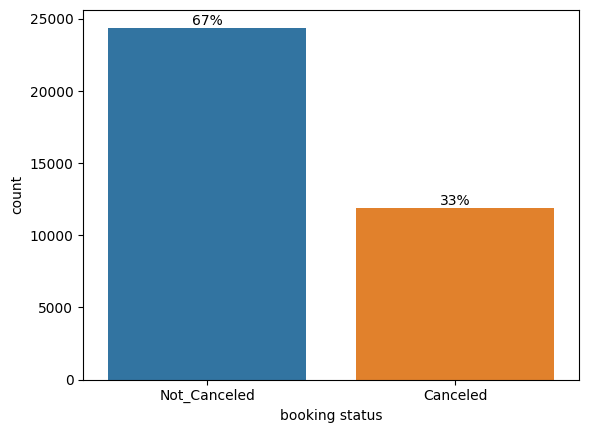

In [9]:
ax = sns.countplot(df, x="booking status", hue="booking status")

total = df["booking status"].count()
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{(x/total)*100:0.0f}%")

plt.show()

Around 33% of the booking are cancelled, and this is a big problem for the hotel industry, so we need to predict the booking status to take the necessary actions to avoid the cancellation.  

In [70]:
pd.crosstab(
    df["type of meal"],
    df["booking status"],
    margins=True,
    margins_name="Total",
    # normalize=True,
    # values=df["average price "],
    # aggfunc="mean",
)

booking status,Canceled,Not_Canceled,Total
type of meal,,,
Meal Plan 1,8681,19161,27842
Meal Plan 2,1507,1799,3306
Meal Plan 3,1,4,5
Not Selected,1700,3432,5132
Total,11889,24396,36285


# repeated

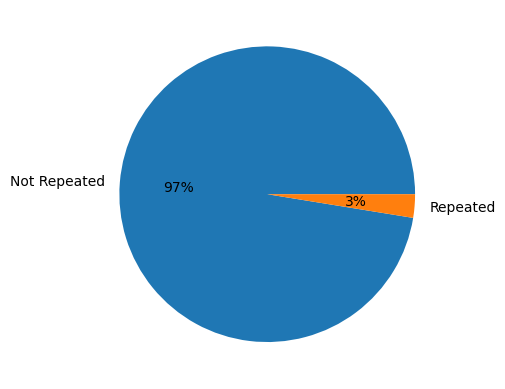

In [10]:
repeated = df["repeated"].value_counts()
plt.pie(
    x=repeated.values,
    labels=np.where(repeated.keys() == 0, "Not Repeated", "Repeated"),
    autopct="%0.0f%%",
)
plt.show()

97% of guests don't come back to the hotel, so we suggest to give a discount to the guests who have already stayed at the hotel for the next reservation.

# room type

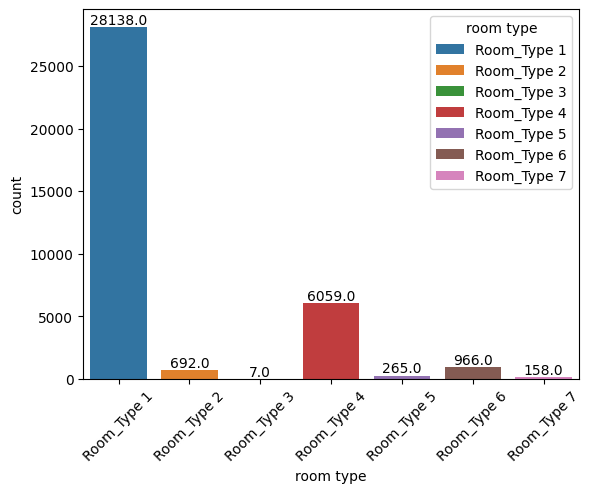

In [25]:
ax = sns.countplot(
    df.sort_values(by="room type"),
    x="room type",
    hue="room type",
    legend=True,
)
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{x}")
plt.xticks(rotation=45)
plt.show()

In [26]:
df.groupby("room type")["average price "].mean()

room type
Room_Type 1     95.917067
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.285415
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: average price , dtype: float64

There are 7 types of rooms, and the most common type is 1, so we suggest to increase the number of rooms of this type. 

room type 3 has the lowest revenue, and the lowest number of bookings, so we suggest to decrease the number of rooms of this type.

# date of reservation

In [12]:
df[["day", "month", "year"]] = pd.DataFrame(
    df["date of reservation"]
    .apply(
        lambda x: re.split("/|-", x),
    )
    .to_list(),
)
df.drop("date of reservation", axis=1, inplace=True)

In [13]:
df["day"] = df["day"].astype(int)
df["month"] = df["month"].astype(int)
df["year"] = df["year"].astype(int)

In [14]:
swap_month_day = df["month"].loc[df["month"] > 12].index

In [15]:
df.loc[swap_month_day,"day"], df.loc[swap_month_day,"month"] = df.loc[swap_month_day,"month"], df.loc[swap_month_day,"day"]

In [16]:
swap_day_year = df["day"].loc[df["day"] > 31].index

In [17]:
df.loc[swap_day_year,"day"], df.loc[swap_day_year,"year"] = df.loc[swap_day_year,"year"], df.loc[swap_day_year,"day"]

From Date of reservation, we can get some insights like the most common month for reservation, the most common day for reservation.
- Knowing the peak time for reservation can help the hotel to prepare for the high demand.
- Giving discounts for the low demand time can help to increase the number of reservations.

In [74]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,day,month,year
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,10,2,2015
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,11,6,2018
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,28,2,2018
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,20,5,2017
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,4,11,2018


# type of meal

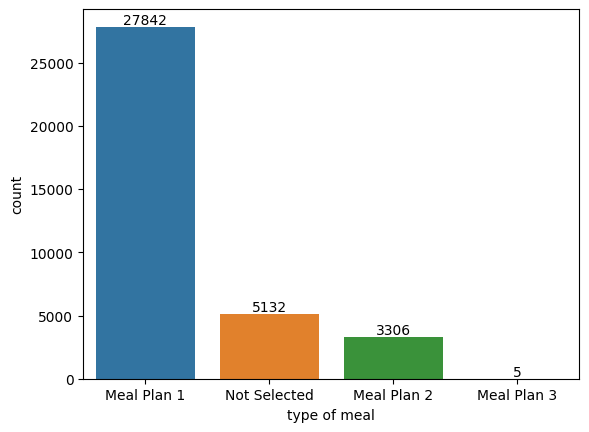

In [18]:
ax = sns.countplot(df, x="type of meal", hue="type of meal")

for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{int(x)}")

plt.show()

For the type of meal, the most common plan is 1, so we suggest to increase the number of meals of this type. the meal plan 3 is the least common and it is better to remove it, because it may cost the hotel more than the revenue.

In [23]:
df.groupby("type of meal")["average price "].mean()

type of meal
Meal Plan 1     103.591571
Meal Plan 2     115.301476
Meal Plan 3      41.200000
Not Selected     94.907414
Name: average price , dtype: float64

# number of weekend nights, number of week nights

# car parking space

In [19]:
df.groupby("day")["car parking space"].sum().sort_values()

day
2      19
1      21
29     23
6      23
25     25
31     25
3      26
26     27
30     27
17     28
5      28
4      29
22     30
10     31
14     31
27     32
11     36
12     38
20     38
7      39
16     39
19     40
15     41
18     42
24     42
13     44
9      47
21     47
23     50
28     51
8     105
Name: car parking space, dtype: int64